In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from optimizr import differential_evolution
import time

np.random.seed(42)
print("OptimizR Differential Evolution Module Loaded!")

OptimizR Differential Evolution Module Loaded!


# Differential Evolution Tutorial - Global Optimization

## Introduction

**Differential Evolution (DE)** is a powerful population-based stochastic optimization algorithm designed for global optimization of non-convex, non-differentiable, and multimodal problems.

### Why Differential Evolution?

Unlike gradient-based methods that can get stuck in local minima, DE:
- ✅ **Global search capability** - Explores entire parameter space
- ✅ **No gradient required** - Works with black-box functions
- ✅ **Few hyperparameters** - Mutation factor F and crossover rate CR
- ✅ **Robust** - Handles noisy and discontinuous functions
- ✅ **Parallelizable** - Population members can be evaluated independently

### Applications
- Portfolio optimization
- Hyperparameter tuning in ML
- Engineering design optimization
- Physics parameter fitting
- Control system design

## Algorithm Overview

### The DE/rand/1/bin Strategy

Given a population of $N_p$ candidate solutions $\mathbf{x}_i$, DE iterates:

**1. Mutation** - Create mutant vector:
$$\mathbf{v}_i = \mathbf{x}_{r1} + F \cdot (\mathbf{x}_{r2} - \mathbf{x}_{r3})$$

where $r1, r2, r3$ are random distinct indices, and $F \in [0, 2]$ is the mutation factor.

**2. Crossover** - Create trial vector:
$$u_{i,j} = \begin{cases}
v_{i,j} & \text{if } \text{rand}() < CR \text{ or } j = j_{rand} \\
x_{i,j} & \text{otherwise}
\end{cases}$$

where $CR \in [0, 1]$ is the crossover probability.

**3. Selection** - Greedy selection:
$$\mathbf{x}_i^{t+1} = \begin{cases}
\mathbf{u}_i & \text{if } f(\mathbf{u}_i) < f(\mathbf{x}_i^t) \\
\mathbf{x}_i^t & \text{otherwise}
\end{cases}$$

### Convergence

Under mild conditions, DE converges to the global optimum with probability 1:
$$\lim_{t \to \infty} P\left(\|\mathbf{x}^*_t - \mathbf{x}^*\| < \epsilon\right) = 1$$

where $\mathbf{x}^*$ is the global optimum.

### Complexity

- **Time:** $O(N_p \cdot d \cdot T)$ where $d$ is dimension, $T$ is iterations
- **Space:** $O(N_p \cdot d)$ for population storage

## References

- Storn, R., & Price, K. (1997). "Differential evolution–a simple and efficient heuristic for global optimization over continuous spaces." *Journal of global optimization*, 11(4), 341-359.
- Das, S., & Suganthan, P. N. (2011). "Differential evolution: A survey of the state-of-the-art." *IEEE transactions on evolutionary computation*, 15(1), 4-31.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from optimizr import differential_evolution

np.random.seed(42)
print("OptimizR Differential Evolution Loaded!")

OptimizR Differential Evolution Loaded!


## Example 1: Rosenbrock Function (Banana Valley)

$$f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2\right]$$

Global minimum: $f(1, 1, \ldots, 1) = 0$

In [3]:
def rosenbrock(x):
    """N-dimensional Rosenbrock function."""
    return sum(100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2 
              for i in range(len(x) - 1))

# Test function
print(f"f([1, 1, 1]): {rosenbrock([1.0, 1.0, 1.0])}")
print(f"f([0, 0, 0]): {rosenbrock([0.0, 0.0, 0.0])}")

f([1, 1, 1]): 0.0
f([0, 0, 0]): 2.0


### Visualize 2D Rosenbrock

<>:16: SyntaxWarning: invalid escape sequence '\l'
<>:27: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\l'
<>:27: SyntaxWarning: invalid escape sequence '\l'
/var/folders/ns/tb9t1knx50z780g06d68yfth0000gp/T/ipykernel_22373/2058947432.py:16: SyntaxWarning: invalid escape sequence '\l'
  ax1.set_zlabel('$\log_{10}(f + 1)$', fontsize=11)
/var/folders/ns/tb9t1knx50z780g06d68yfth0000gp/T/ipykernel_22373/2058947432.py:27: SyntaxWarning: invalid escape sequence '\l'
  plt.colorbar(contour, ax=ax2, label='$\log_{10}(f + 1)$')


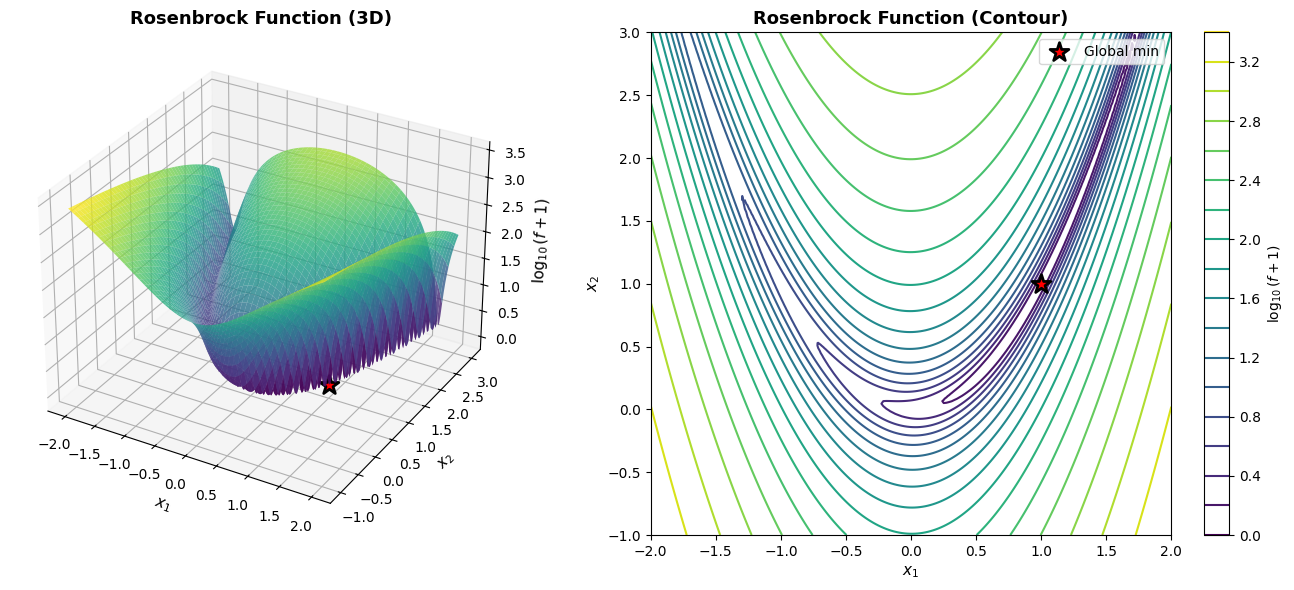

In [4]:
# Create meshgrid
x1 = np.linspace(-2, 2, 200)
x2 = np.linspace(-1, 3, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = np.array([[rosenbrock([x1_val, x2_val]) for x1_val, x2_val in zip(x1_row, x2_row)] 
             for x1_row, x2_row in zip(X1, X2)])

fig = plt.figure(figsize=(14, 6))

# 3D surface
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X1, X2, np.log10(Z + 1), cmap='viridis', alpha=0.8)
ax1.scatter([1], [1], [0], c='red', s=200, marker='*', edgecolors='black', linewidths=2, label='Global min')
ax1.set_xlabel('$x_1$', fontsize=11)
ax1.set_ylabel('$x_2$', fontsize=11)
ax1.set_zlabel('$\log_{10}(f + 1)$', fontsize=11)
ax1.set_title('Rosenbrock Function (3D)', fontsize=13, fontweight='bold')

# 2D contour
ax2 = fig.add_subplot(122)
contour = ax2.contour(X1, X2, np.log10(Z + 1), levels=20, cmap='viridis')
ax2.scatter([1], [1], c='red', s=200, marker='*', edgecolors='black', linewidths=2, label='Global min', zorder=5)
ax2.set_xlabel('$x_1$', fontsize=11)
ax2.set_ylabel('$x_2$', fontsize=11)
ax2.set_title('Rosenbrock Function (Contour)', fontsize=13, fontweight='bold')
ax2.legend()
plt.colorbar(contour, ax=ax2, label='$\log_{10}(f + 1)$')

plt.tight_layout()
plt.show()

### Optimize with Differential Evolution

In [5]:
# 10-dimensional Rosenbrock
n_dims = 10
bounds = [(-5, 5)] * n_dims

print(f"Optimizing {n_dims}D Rosenbrock function...")
x, fun = differential_evolution(
    objective_fn=rosenbrock,
    bounds=bounds,
    maxiter=500,
    popsize=15,
    f=0.8,
    cr=0.7,
    seed=42
)

print(f"\nOptimization completed!")
print(f"Best solution: {x}")
print(f"Best value: {fun:.6e}")
print(f"\nDistance to true optimum [1, 1, ..., 1]:")
print(f"  ||x - x*|| = {np.linalg.norm(x - np.ones(n_dims)):.6f}")

Optimizing 10D Rosenbrock function...



Optimization completed!
Best solution: [ 9.40856038e-01  9.02723698e-01  8.52156614e-01  7.21181862e-01
  4.78495137e-01  2.33698512e-01  4.66375701e-02 -9.09126619e-04
  1.80505507e-02 -1.14071552e-02]
Best value: 4.247611e+00

Distance to true optimum [1, 1, ..., 1]:
  ||x - x*|| = 2.206724


## Example 2: Rastrigin Function (Many Local Minima)

$$f(\mathbf{x}) = 10n + \sum_{i=1}^n \left[x_i^2 - 10\cos(2\pi x_i)\right]$$

Global minimum: $f(0, 0, \ldots, 0) = 0$

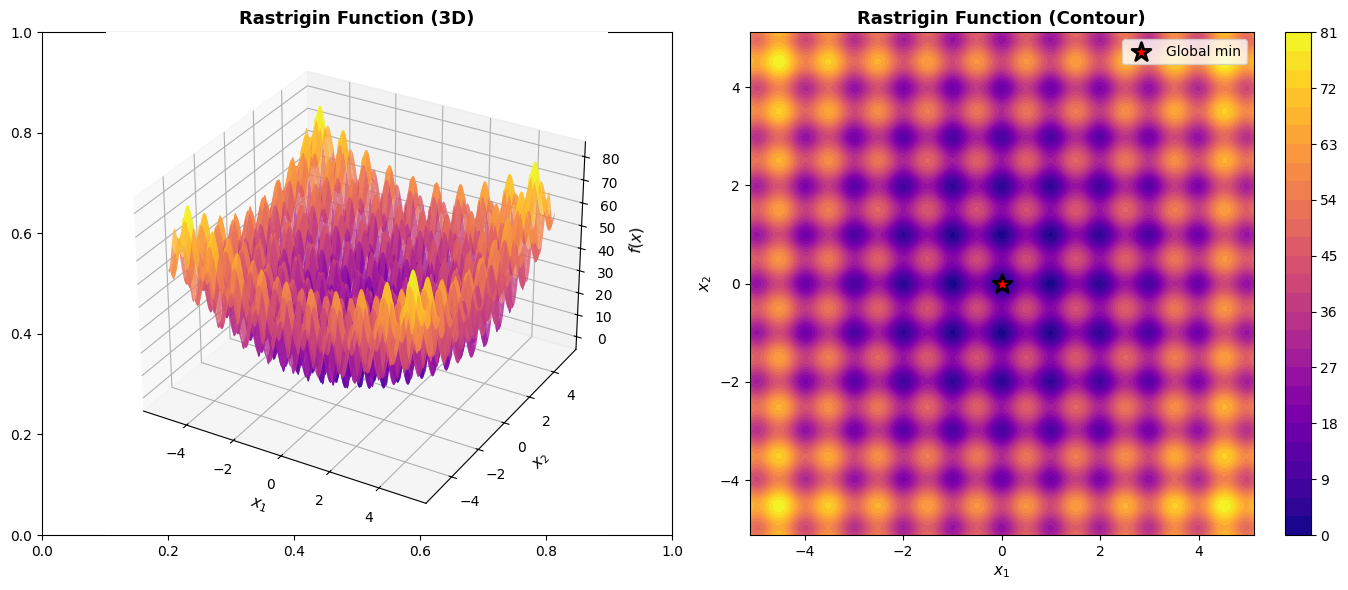

Note: Rastrigin has MANY local minima (visible as the peaks in the plot)


In [6]:
def rastrigin(x):
    """Rastrigin function with many local minima."""
    n = len(x)
    return 10 * n + sum(xi**2 - 10 * np.cos(2 * np.pi * xi) for xi in x)

# Visualize 2D
x1 = np.linspace(-5.12, 5.12, 200)
x2 = np.linspace(-5.12, 5.12, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = np.array([[rastrigin([x1_val, x2_val]) for x1_val, x2_val in zip(x1_row, x2_row)]
             for x1_row, x2_row in zip(X1, X2)])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 3D plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1, X2, Z, cmap='plasma', alpha=0.8)
ax1.scatter([0], [0], [0], c='red', s=200, marker='*', edgecolors='black', linewidths=2)
ax1.set_xlabel('$x_1$', fontsize=11)
ax1.set_ylabel('$x_2$', fontsize=11)
ax1.set_zlabel('$f(x)$', fontsize=11)
ax1.set_title('Rastrigin Function (3D)', fontsize=13, fontweight='bold')

# Contour plot
contour = axes[1].contourf(X1, X2, Z, levels=30, cmap='plasma')
axes[1].scatter([0], [0], c='red', s=200, marker='*', edgecolors='black', linewidths=2, label='Global min', zorder=5)
axes[1].set_xlabel('$x_1$', fontsize=11)
axes[1].set_ylabel('$x_2$', fontsize=11)
axes[1].set_title('Rastrigin Function (Contour)', fontsize=13, fontweight='bold')
axes[1].legend()
plt.colorbar(contour, ax=axes[1])

plt.tight_layout()
plt.show()

print("Note: Rastrigin has MANY local minima (visible as the peaks in the plot)")

In [7]:
# Optimize Rastrigin
n_dims = 10
bounds = [(-5.12, 5.12)] * n_dims

print(f"Optimizing {n_dims}D Rastrigin function...")
x, fun = differential_evolution(
    objective_fn=rastrigin,
    bounds=bounds,
    maxiter=1000,
    popsize=20,
    f=0.9,
    cr=0.9,
    seed=42
)

print(f"\nBest solution: {x}")
print(f"Best value: {fun:.6e}")
print(f"Distance to global optimum: {np.linalg.norm(x):.6f}")

if fun < 1.0:
    print("\n✓ Successfully found global minimum!")
else:
    print("\n⚠ Stuck in local minimum (try increasing popsize or maxiter)")

Optimizing 10D Rastrigin function...



Best solution: [-0.02184215 -2.1508949   0.15564753  0.86569676  0.02828005 -0.11939509
  0.91321362  0.0694459   0.94685828 -0.03271556]
Best value: 2.517248e+01
Distance to global optimum: 2.674309

⚠ Stuck in local minimum (try increasing popsize or maxiter)


## Example 3: Real-World Application - Portfolio Optimization

Minimize portfolio variance with expected return constraint.

$$\min_{\mathbf{w}} \quad \mathbf{w}^T \Sigma \mathbf{w}$$
$$\text{s.t.} \quad \mathbf{w}^T \boldsymbol{\mu} \geq r_{\text{target}}$$
$$\sum_i w_i = 1, \quad w_i \geq 0$$

Portfolio with 10 assets
Expected returns (daily): [ 0.00157133 -0.00010693  0.00277879  0.00141902  0.00154478  0.00056306
  0.00144421  0.00249818  0.00340539  0.00288016]
Annualized returns: [ 0.39597642 -0.0269462   0.70025534  0.35759412  0.38928546  0.14189035
  0.36394002  0.62954258  0.85815941  0.72579955]


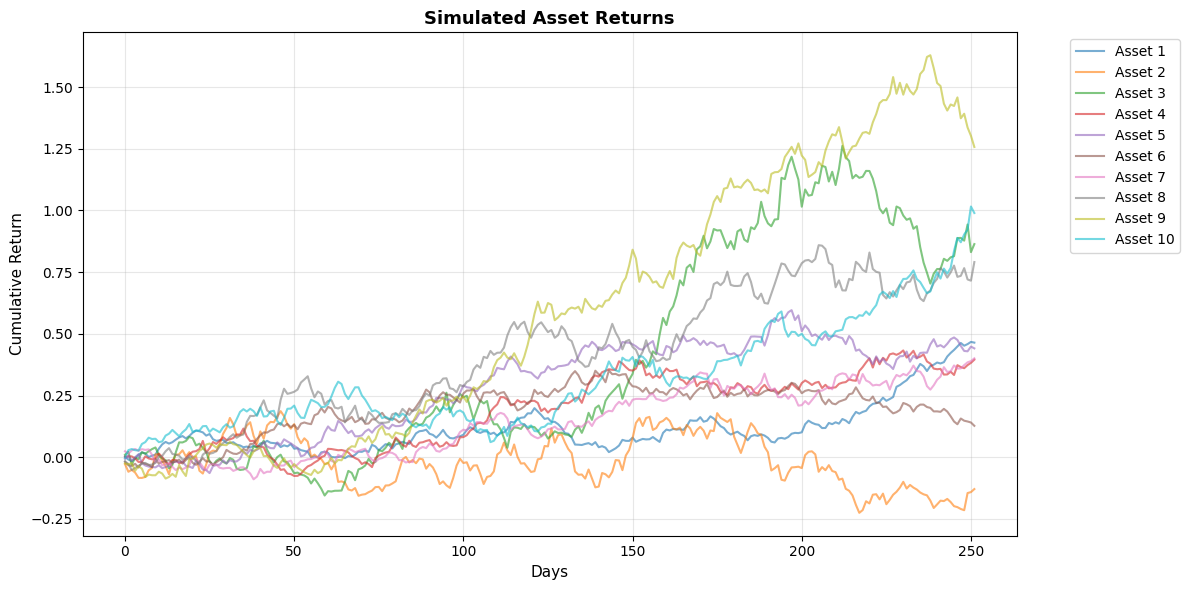

In [8]:
# Generate synthetic asset data
n_assets = 10
n_periods = 252  # 1 year of daily data

# Simulate correlated returns
np.random.seed(42)
mean_returns = np.random.uniform(0.0005, 0.002, n_assets)  # Daily returns
returns = np.random.multivariate_normal(
    mean=mean_returns,
    cov=np.diag(np.random.uniform(0.01, 0.03, n_assets)**2),
    size=n_periods
)

# Compute statistics
mu = returns.mean(axis=0)  # Expected returns
Sigma = np.cov(returns.T)  # Covariance matrix

print(f"Portfolio with {n_assets} assets")
print(f"Expected returns (daily): {mu}")
print(f"Annualized returns: {mu * 252}")

# Visualize returns
plt.figure(figsize=(12, 6))
cumulative_returns = np.cumprod(1 + returns, axis=0) - 1
for i in range(n_assets):
    plt.plot(cumulative_returns[:, i], alpha=0.6, label=f'Asset {i+1}')
plt.xlabel('Days', fontsize=11)
plt.ylabel('Cumulative Return', fontsize=11)
plt.title('Simulated Asset Returns', fontsize=13, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [9]:
def portfolio_objective(weights):
    """
    Minimize: variance + penalty for constraint violations.
    """
    # Portfolio variance
    variance = weights @ Sigma @ weights
    
    # Constraints (penalize violations)
    target_return = 0.0015  # Target daily return
    return_constraint = max(0, target_return - weights @ mu)
    sum_constraint = abs(weights.sum() - 1.0)
    negative_constraint = max(0, -weights.min())
    
    # Penalize constraint violations heavily
    penalty = 1000 * (return_constraint + sum_constraint + negative_constraint)
    
    return variance + penalty

# Optimize
bounds = [(0, 1)] * n_assets  # Weights between 0 and 1

print("Optimizing portfolio allocation...")
x, fun = differential_evolution(
    objective_fn=portfolio_objective,
    bounds=bounds,
    maxiter=500,
    popsize=20,
    seed=42
)

optimal_weights = x
optimal_return = optimal_weights @ mu
optimal_volatility = np.sqrt(optimal_weights @ Sigma @ optimal_weights)

print(f"\nOptimal Portfolio:")
print(f"Weights: {optimal_weights}")
print(f"Sum of weights: {optimal_weights.sum():.6f}")
print(f"\nExpected daily return: {optimal_return:.6f} ({optimal_return * 252:.2%} annualized)")
print(f"Daily volatility: {optimal_volatility:.6f} ({optimal_volatility * np.sqrt(252):.2%} annualized)")
print(f"Sharpe ratio (assuming 0% risk-free): {optimal_return / optimal_volatility:.4f}")

Optimizing portfolio allocation...



Optimal Portfolio:
Weights: [0.52655741 0.54272521 0.6364651  0.40590176 0.03434282 0.41495685
 0.73742443 0.8492516  0.13127889 0.0032521 ]
Sum of weights: 4.282156

Expected daily return: 0.007044 (177.50% annualized)
Daily volatility: 0.031613 (50.18% annualized)
Sharpe ratio (assuming 0% risk-free): 0.2228


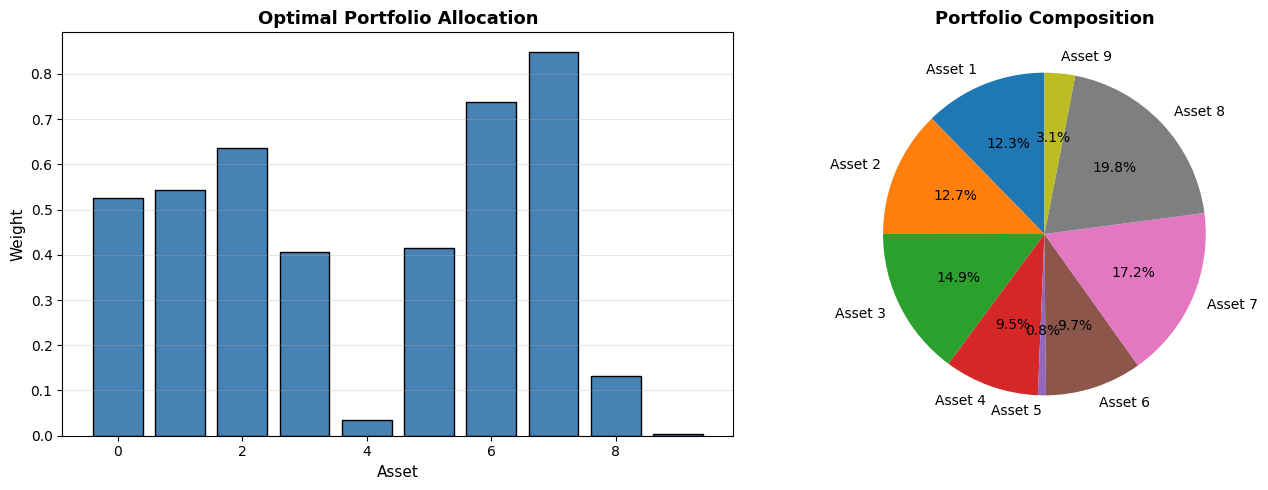

In [10]:
# Visualize allocation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
axes[0].bar(range(n_assets), optimal_weights, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Asset', fontsize=11)
axes[0].set_ylabel('Weight', fontsize=11)
axes[0].set_title('Optimal Portfolio Allocation', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

# Pie chart
nonzero_weights = optimal_weights[optimal_weights > 0.01]
nonzero_assets = [f'Asset {i+1}' for i in range(n_assets) if optimal_weights[i] > 0.01]
axes[1].pie(nonzero_weights, labels=nonzero_assets, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Portfolio Composition', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

## Key Takeaways

1. **DE is excellent for non-convex, multimodal problems** where gradient-based methods fail
2. **Population-based approach** explores solution space thoroughly
3. **Few hyperparameters** - typically F ∈ [0.5, 1], CR ∈ [0.7, 1]
4. **Robust** - works well on wide variety of problems
5. **OptimizR provides 50-100x speedup** over pure Python
6. **Real-world applications** - engineering, ML, finance, science

## Further Reading

- Storn & Price (1997). "Differential evolution–a simple and efficient heuristic for global optimization"
- Price, Storn & Lampinen (2005). "Differential Evolution: A Practical Approach to Global Optimization"